In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/Users/han-eunbi/Desktop/UIUC/23Spring/IE517/data/ccdefault.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
X = df.drop(['ID','DEFAULT'],axis=1)
y = df['DEFAULT']


In [5]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y, random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((27000, 23), (3000, 23), (27000,), (3000,))

In [9]:
single_t = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print('max depth of single tree is ',single_t.max_features_)

max depth of single tree is  23


before fitting randomforestmodel I will train single tree to find optial parameters

In [10]:
dt = DecisionTreeClassifier(random_state=1)
depth = np.arange(2,10,1)

grid = dict(max_depth = depth)
skf = StratifiedKFold(n_splits = 10,shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator = dt,
                          param_grid = grid,
                          cv = skf,
                          scoring = 'accuracy',
                          error_score = 0)
dt_cv = grid_search.fit(X_train,y_train)
print("Best parameter of single tree is ",dt_cv.best_params_)

Best parameter of single tree is  {'max_depth': 4}


In [12]:
rf = RandomForestClassifier(random_state=1)

estimator = [50,100,300,500]
depth = [2,3,4,5]

grid = dict(n_estimators = estimator, max_depth = depth)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
grid_search = GridSearchCV(estimator = rf,
                           param_grid = grid,
                           cv = skf,
                           scoring = 'accuracy',
                           error_score = 0)

rf_cv = grid_search.fit(X_train,y_train)

In [14]:
for i in range(16):# 5 x 4 = 20
    print("parameters",rf_cv.cv_results_['params'][i])
    print('in-sample accuracy : ',np.round(rf_cv.cv_results_['mean_test_score'][i],4))
    print('\n')

parameters {'max_depth': 2, 'n_estimators': 50}
in-sample accuracy :  0.8039


parameters {'max_depth': 2, 'n_estimators': 100}
in-sample accuracy :  0.8016


parameters {'max_depth': 2, 'n_estimators': 300}
in-sample accuracy :  0.8004


parameters {'max_depth': 2, 'n_estimators': 500}
in-sample accuracy :  0.801


parameters {'max_depth': 3, 'n_estimators': 50}
in-sample accuracy :  0.8115


parameters {'max_depth': 3, 'n_estimators': 100}
in-sample accuracy :  0.8091


parameters {'max_depth': 3, 'n_estimators': 300}
in-sample accuracy :  0.8087


parameters {'max_depth': 3, 'n_estimators': 500}
in-sample accuracy :  0.8088


parameters {'max_depth': 4, 'n_estimators': 50}
in-sample accuracy :  0.8133


parameters {'max_depth': 4, 'n_estimators': 100}
in-sample accuracy :  0.8124


parameters {'max_depth': 4, 'n_estimators': 300}
in-sample accuracy :  0.8118


parameters {'max_depth': 4, 'n_estimators': 500}
in-sample accuracy :  0.8119


parameters {'max_depth': 5, 'n_estimators': 

In [15]:
print("Best parameters are ",rf_cv.best_params_)

Best parameters are  {'max_depth': 5, 'n_estimators': 50}


In [16]:
best_model = rf_cv.best_estimator_
prediction = np.round(best_model.score(X_test,y_test),4)
print("Test accuracy score of best model is ", prediction)

Test accuracy score of best model is  0.8207


## Part 2 : Random Forest Feature Importance

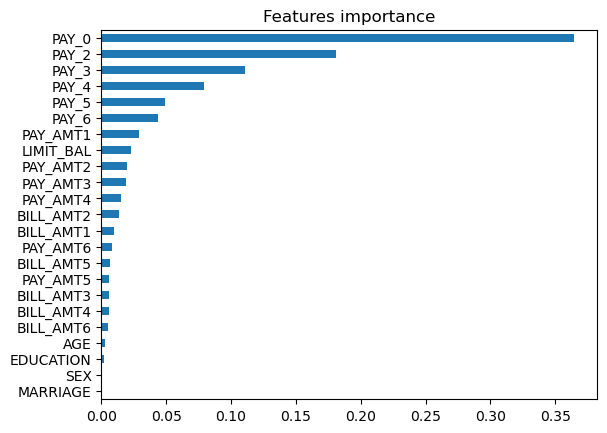

In [20]:
# individual feature importance of best model 
importance = pd.Series(data = best_model.feature_importances_,
                      index = X_train.columns)
importances_sorted = importance.sort_values()
importances_sorted.plot(kind='barh')
plt.title("Features importance")
plt.show()

## Part 3 : Conclusion

##### a. What is the relationship between n_estimators, in-sample CV accuracy and computation time?


Raising the value of 'n_estimators' can enhance the accuracy of the model, but only up to a certain point where any further improvements become minor. Elevating 
'n_estimators' also results in an increase in computational time. 

##### b. What is the optimal number of estimators for your forest?

Best parameters are  {'max_depth': 5, 'n_estimators': 50}

##### c. Which features contibute the most importance in your model according to scikit-learn function?

PAY_0

##### d. What is feature importance and how is it calculated

Impurity - based feature importances is the normalized total reduction of the criterion brought by that features

In [23]:
print("My name is Eunbi Han")
print("My NETID is eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation")

My name is Eunbi Han
My NETID is eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation
